## Word Lists and Sentiment Analysis



A traditional method of analyzing texts is to compute the proportion of the words have positive connotations, negative connotations or are neutral. This method is commonly referred to as sentiment analysis. The typical approach to sentiment analysis is to see how many words in a text are also in a predefined list of words associated with a sentiment. So "I am having a bad day." might score a "1" on a negative sentiment scale for the presence of "bad" or a .17 because one of six of the words is negative. Some sentiment systems rank words on a scale, so that "terrific" might be a 5 while "fine" scores a 1. 

Some systems go beyond positive and negative. The proprietary LIWC program, for example, extends this to measure dozens of other word attributes, such as "tone", "analytic thinking", and "clout". More generally, these methods can be used whenever you have a list of words, and you want to count their occurrences in a set of texts. They are commonly referred to as "dictionary methods."

This lesson introduces two different dictionaries that are available in Python, AFINN, and Vader. It concludes by showing how to analyze a text corpus for occurrences on any arbitrary word list.

This lesson assumes your computer has an Anaconda Python 3.7 distribution installed.

#### AFINN

[AFINN](http://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=6010) is an English word listed developed by Finn Årup Nielsen. Words scores range from minus five (negative) to plus five (positive). The English language dictionary consists of 2,477 coded words.

If this is your first time running this notebook, you may need to install it:

```
%pip install afinn
```

In [1]:
%pip install afinn
%pip install git+https://github.com/olavski/afinn

Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/olavski/afinn to /private/var/folders/db/9wfhxd0n6mvf150g7mv79r3c0000gn/T/pip-req-build-li0zx47f
  Running command git clone -q https://github.com/olavski/afinn /private/var/folders/db/9wfhxd0n6mvf150g7mv79r3c0000gn/T/pip-req-build-li0zx47f
  Stored in directory: /private/var/folders/db/9wfhxd0n6mvf150g7mv79r3c0000gn/T/pip-ephem-wheel-cache-eh62eq8o/wheels/67/d2/f7/5697f49e8f94e91058bf639782d135a3a3ec778ae7051f3888
Successfully built afinn
  Found existing installation: afinn 0.1
    Uninstalling afinn-0.1:
      Successfully uninstalled afinn-0.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline

from afinn import Afinn

import pandas as pd
pd.set_option('max_colwidth', 100)

After importing `Afinn`, you need to set the language, English (`en`), Danish (`da`), Swedish (`sv`),  Norwegian (`no`), french (`fr`), or emoticon (`emoticons`). 

In [3]:
afinn = Afinn(language='en')

The `score` method returns the sum of word valence scores for a text string.

In [4]:
afinn.score('Bad day.')

-3.0

In [5]:
afinn.score('Good day.')

3.0

In [6]:
afinn.score('Horrible, bad day.')

-6.0

In [7]:
afinn_no = Afinn(language='no')


In [8]:
afinn_no.score('Google translate er min beste venn!')

4.0

In all these cases, `afinn` has preprocessed the text by removing the punctuation, converting all the words to lower-case, and before analyzing it. 

<div class="alert alert-info">
<h3>Your turn</h3>
<p>Create a sentence with a score of +10 or greater and one of -10 or lower.</div>




In [9]:
afinn.score("We want yummy, delicious, awesome dessert.")

11.0

In [10]:
afinn.score("Down the rabbit hole.")

0.0

### Behind the scenes

 Before using a sentiment dictionary, it is useful to see whether it has any face validity.  To do that, we can look at a sample of the words from the list.

After importing the pandas library, the cell below will load word list as a pandas dataframe from the tab-delimited version on Afinn's GitHub page and display a sample of 10 words.

In [11]:
afinn_wl_url = ('https://raw.githubusercontent.com'
                '/fnielsen/afinn/master/afinn/data/AFINN-111.txt')

afinn_wl_df = pd.read_csv(afinn_wl_url, 
                          header=None, # no column names
                          sep='\t',  # tab sepeated
                          names=['term', 'value']) #new column names

seed = 808 # seed for sample so results are stable
afinn_wl_df.sample(10)

,term,value
1787,prosecutes,-1
1154,harshest,-2
2169,suffering,-2
2294,uncomfortable,-2
2463,wreck,-2
2016,shortage,-2
2219,terrorize,-3
1715,piteous,-2
410,cleaner,2
323,broken,-1


We can get a sense of the distribution of word values by plotting them:

In [12]:
afinn_wl_df.sort_values(by='value', ascending=False)

,term,value
2179,superb,5
2234,thrilled,5
1648,outstanding,5
1226,hurrah,5
315,breathtaking,5
2429,winner,4
1500,masterpieces,4
1089,godsend,4
2428,win,4
320,brilliant,4


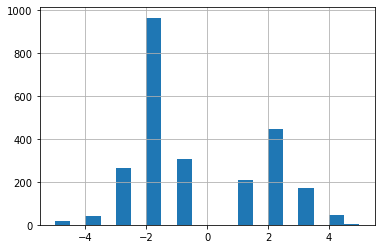

In [13]:
%matplotlib inline

afinn_wl_df['value'].hist(bins=20)

Overall, the dictionary appears to have more negative words than positive words, but the values for both positive and negative words are rarely extreme, with both two and negative two as the most common values.

## Applying the dictionary

We can use Afinn to analyze a more extensive text database.  Aashita Kesarwani put together a [corpus](https://www.kaggle.com/aashita/nyt-comments/home) of comments made to New York Times articles. I sampled 10,000 of these from April 2017 and stored them as a JSON file.


In [14]:
wine_df_full = pd.read_csv('data/wine_reviews.csv')

In [15]:
wine_df = wine_df_full.sample(10000).reset_index()

The `head` method provides an overview of the dataframe.

In [16]:
wine_df.head()

,index,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,rating
0,77490,US,"A splendid Chardonnay, rich, vital and elegant, with so many layers of interest. Framed by a cut...",Susanna's Vineyard,96,50.0,California,Russian River Valley,Sonoma,NaN,NaN,Lynmar 2010 Susanna's Vineyard Chardonnay (Russian River Valley),Chardonnay,Lynmar,High
1,39530,Portugal,A rich opening is followed by firm tannins. The wine has ample weight and a solid structure arou...,Vintage,94,NaN,Port,NaN,NaN,Roger Voss,@vossroger,Maynard's 2011 Vintage (Port),Port,Maynard's,High
2,3178,Greece,This is a great example of a variety Americans are still learning to embrace. Plum and cherry ar...,Single Vineyard Selection,87,25.0,Nemea,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Palivou 2012 Single Vineyard Selection Agiorgitiko (Nemea),Agiorgitiko,Palivou,Low
3,46461,US,"A Bordeaux blend with a Right Bank inclination, this offers forward fruit aromas and flavors of ...",domenica,86,20.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,DiStefano 2007 domenica Red (Columbia Valley (WA)),Bordeaux-style Red Blend,DiStefano,Low
4,25631,US,"You'll find plenty of blackberry, cherry, currant and oak flavors in this 100% Cabernet. Aging i...",Blackjack Pasture Estate Bottled,85,50.0,California,Carmel Valley,Central Coast,NaN,NaN,Galante 2007 Blackjack Pasture Estate Bottled Cabernet Sauvignon (Carmel Valley),Cabernet Sauvignon,Galante,Low


The column of interest is *commentBody.* 

To estimate the Afinn sentiment score for all of the responses in the dataframe, we can `apply` the scorer to the commentBody column to create a new column. Applying this function takes a couple of seconds.

In [18]:
wine_df['afinn_score'] = wine_df['description'].apply(afinn.score)

`describe` gives a sense of the distribution. 

In [19]:
wine_df['afinn_score'].describe()

count    10000.000000
mean         3.466500
std          3.540979
min         -8.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         29.000000
Name: afinn_score, dtype: float64

It is also useful to sort by `afinn_score` to get a sense of what is in the extreme scoring comments. In this case, I subset the dataframe to display just the two relevant columns. 

In [20]:
columns_to_display = ['description', 'afinn_score']

wine_df.sort_values(by='afinn_score', ascending=False)[columns_to_display].head(10)

,description,afinn_score
9631,Slight notes of iron oxide inform the dense and richly textured red cherry fruit of this sumptuo...,29.0
2556,"This supremely elegant and age-worthy Sassicaia opens with an intense bouquet of black cherry, M...",23.0
1020,Viader has a long history of producing great Bordeaux-style blends grown at a high elevation on ...,23.0
5619,Wonderfully lively notes of fresh aromatic orange and citrus zest mingle together. The palate is...,22.0
9571,Deutz's top cuvée is as good as ever. Bottle aging has helped it to throw off its youthful awakw...,22.0
54,"This Cabernet is a blend of estate and purchased fruit. In a successful year, it rivals Stag's L...",21.0
5931,"This new wine from an estate vineyard is the strong, quiet type that's not effusively fruity but...",20.0
283,"This very fine Cabernet wants a little time in the cellar. Right now, it's tight in tannins, wit...",20.0
1812,"Just delicious, an important, elegant Merlot to drink with the finest steaks and chops. Even bet...",20.0
9280,"While this bottling is always interesting, it is dependent on vintage conditions. This bottling,...",20.0


In [21]:
worst = wine_df.sort_values(by='afinn_score').index[0]

print(wine_df.iloc[worst]['description'])


A bizarre blend of lime, unipe pineapple, banana and tropical fruit marks this clumsy, disjointed wine. It's not bad, but it's all elbows, with hard edges sticking out all over.


By default, the sort is ascending, mean the lowest scoring, or most negative comments, are displayed by `head`. The comments with the highest score are shown with `tail`. 

In [22]:
wine_df.sort_values(by='afinn_score')[columns_to_display].tail(10)

,description,afinn_score
5931,"This new wine from an estate vineyard is the strong, quiet type that's not effusively fruity but...",20.0
9280,"While this bottling is always interesting, it is dependent on vintage conditions. This bottling,...",20.0
283,"This very fine Cabernet wants a little time in the cellar. Right now, it's tight in tannins, wit...",20.0
1812,"Just delicious, an important, elegant Merlot to drink with the finest steaks and chops. Even bet...",20.0
54,"This Cabernet is a blend of estate and purchased fruit. In a successful year, it rivals Stag's L...",21.0
9571,Deutz's top cuvée is as good as ever. Bottle aging has helped it to throw off its youthful awakw...,22.0
5619,Wonderfully lively notes of fresh aromatic orange and citrus zest mingle together. The palate is...,22.0
2556,"This supremely elegant and age-worthy Sassicaia opens with an intense bouquet of black cherry, M...",23.0
1020,Viader has a long history of producing great Bordeaux-style blends grown at a high elevation on ...,23.0
9631,Slight notes of iron oxide inform the dense and richly textured red cherry fruit of this sumptuo...,29.0


In [23]:
best = wine_df.sort_values(by='afinn_score', ascending=False).index[0]

print(wine_df.iloc[best]['description'])



Slight notes of iron oxide inform the dense and richly textured red cherry fruit of this sumptuous, velvety red. Direction and sleekness are courtesy of wonderfully ripe but vibrant acidity. This is delicious now with its wonderful red fruit, but will age beautifully. Classy, vibrant and generous.


One of the drawbacks to using the raw Afinn score is the that longer texts may yield higher values simply because they contain more words. To adjust for that, we can divide the score by the number of words in the text. 

The most straightforward way to count words in a Python string is to use the `split` method, which splits a string based on white spaces, and then count the length of the resulting list.

In [24]:
from pdtext.tf import word_count

In [25]:
word_count('This sentence has seven words in it.')

7

You can employ that function on our dataframe to create a new column, `word_count` using `appply` to the text column, `commentBody`.

In [26]:
wine_df['word_count'] = wine_df['description'].apply(word_count)

In [27]:
wine_df['word_count'].describe()

count    10000.000000
mean        40.233400
std         12.057258
min          9.000000
25%         32.000000
50%         39.000000
75%         47.000000
max        135.000000
Name: word_count, dtype: float64

We can divide the original score by the word count to produce `afinn_adjusted`. This isn't exactly a percentage variable, since word scores in Afinn can range from -5 to 5, but it is a useful adjustment to control for variable comment length. To make it clearer that this isn't a percent score, and to make the results more readable, the adjustment is multiplied by 100.

In [28]:
wine_df['afinn_adjusted'] = wine_df['afinn_score'] / wine_df['word_count'] * 100

In [29]:
wine_df['afinn_adjusted'].describe()

count    10000.000000
mean         8.500791
std          8.579668
min        -26.666667
25%          2.439024
50%          7.500000
75%         13.461538
max         65.217391
Name: afinn_adjusted, dtype: float64

You can use `groupby` to see how the sentiment score varies by key characteristics.

In [30]:
wine_df.groupby('rating')[['afinn_adjusted','afinn_score']].describe()

afinn_adjusted                                                      \
                count       mean       std        min       25%       50%   
rating                                                                      
High           3941.0  10.497266  7.994311 -11.111111  4.878049  9.433962   
Low            6059.0   7.202208  8.697876 -26.666667  0.000000  6.250000   

                             afinn_score                                     \
              75%        max       count      mean       std  min  25%  50%   
rating                                                                        
High    15.217391  61.702128      3941.0  5.003299  3.859491 -5.0  2.0  5.0   
Low     12.000000  65.217391      6059.0  2.466909  2.910634 -8.0  0.0  2.0   

                   
        75%   max  
rating             
High    7.0  29.0  
Low     4.0  15.0

The above syntax maybe a little complex to decipher.
* `wine_df` is the dataframe we want to use;
* `.groupby('editorsSelection')` creates a pandas `groupby` object split by the values of `rating`;
* `['afinn_adjusted','afinn_score']` are the specific column wes want to focus on;
* `.describe()` produces descriptive statistics for each of the groups.

Pandas can also be used to create the absolute value of a variable using the `abs` method. This is useful for exploring to what extent, in this case, editors embrace or avoid comments that are extreme, either positive or negative.

<div class="alert alert-info">
<h3>Your turn</h3>
<p>Group project. Make a histogram of the sentiment of UN general election speeches.</div>



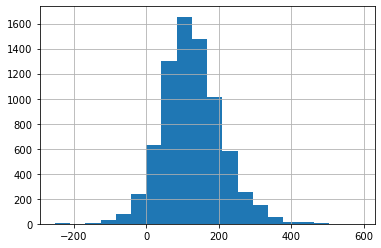

In [33]:
# load the data
un_df = pd.read_json('files/un-general-debates.json')
# Apply afinn.score to text column
un_df['afinn'] = un_df['speech_text'].apply(afinn.score)
# Histogram feature
un_df['afinn'].hist(bins=20)

In [40]:
un_df.sort_values(by='afinn')[:5]

,country_code,speech_text,speech_year,afinn
5924,IRN,"The Islamic revolution of Iran, an anti-imperialist, anti-colonial and anti-despotic revolution ...",1981,-252.0
4085,IRN,I quote from the Holy Koran: 'We verily sent our messengers with \nclear proofs and revealed wit...,1982,-245.0
2800,LBY,"In the \nname of the African Union, I would like to greet the \nmembers of the General Assembly ...",2009,-211.0
4041,SYR,It gives me pleasure to con¬gratulate Mr. Hollai \non his unanimous election as President of the...,1982,-171.0
7476,USA,﻿We meet in a Hall devoted to\npeace; in a city scarred by violence; in a nation\nawakened to da...,2001,-161.0


In [41]:
un_df.sort_values(by='afinn')[-5:]

,country_code,speech_text,speech_year,afinn
1959,CRI,﻿\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n75.\tAs I address this Assembly of the Organization in which ma...,1978,486.0
1935,GRD,"﻿173.\tSir Eric M. GAIRY (Grenada):\n'Make a joyful noise unto the Lord, all ye lands,\n'Serve t...",1978,494.0
1263,UGA,71.\tAs a true African I do not want to speak to you in a foreign language. Thanks to the good o...,1975,531.0
6587,JPN,﻿46.\t On behalf of the Japanese delegation I wish to extend my heartfelt congratulations to Amb...,1973,570.0
2152,GRC,﻿On behalf of the European Community and its member States I should like first to express my mos...,1988,587.0


#### Vader

A second method for sentiment analysis is [vader](https://github.com/cjhutto/vaderSentiment)(Valence Aware Dictionary and sEntiment Reasoner). According to the authors, it is, "a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media." 

As with Afinn, Vader measures both the strength and direction of sentiment. Based on the work of 10 coders, the Vader dictionary includes approximately 7,500 words, emoticons, emojis, acronyms, and commonly used slang. 

Unlike Afinn, Vader scores an entire text, not just words. Looking at the whole text allows for the algorithm to adjust for negations, such as "not", booster words, such as "remarkably". It also scores words written in all caps as more intense. Vader returns the proportion of a text that is negative, positive, and neutral, along with a combined score. 

There is a version included with nltk (`from nltk.sentiment.vader import SentimentIntensityAnalyzer`) but a more recent version can be separately installed:


```
%pip install vaderSentiment
```


In [37]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

Vader requires that you set up an analyzer.

In [38]:
analyzer = SentimentIntensityAnalyzer()

The `polarity_scores` method returns a dictionary with four items. 
* `pos`, `neu`, and `neg`  are the proportions of text that fall in each category.
* `compound` is the normalized, weighted composite score. 

In [42]:
analyzer.polarity_scores('Horrible bad day.')

{'neg': 0.875, 'neu': 0.125, 'pos': 0.0, 'compound': -0.7906}

One useful feature of Vader is that it is able to look at works in context and score appropriately. 

In [43]:
analyzer.polarity_scores("At least it isn't a horrible book.")

{'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'compound': 0.431}

It also scores contemporary lingo and emojis.

In [44]:
analyzer.polarity_scores('Today SUX!')

{'neg': 0.779, 'neu': 0.221, 'pos': 0.0, 'compound': -0.5461}

In [45]:
analyzer.polarity_scores('💋')

{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'compound': 0.4215}

<div class="alert alert-info">
<h3>Your turn</h3>
<p>Rerun your positive and negative sentences from before. How do they score now?</div>





In [46]:
analyzer.polarity_scores("We want yummy, delicious, awesome dessert.")

{'neg': 0.0, 'neu': 0.138, 'pos': 0.862, 'compound': 0.91}

Since Vader returns a dictionary (unlike Afinn which returns a single value), it is slightly more complicated to use it on an entire pandas dataframe.

First, apply the analyzer on the text column. 

In [47]:
sentiment = wine_df['description'].apply(analyzer.polarity_scores)

Our new object `sentiment` is a series, where each item is a dictionary. This series can be unpacked into a dataframe.

In [48]:
sentiment

0         {'neg': 0.024, 'neu': 0.667, 'pos': 0.31, 'compound': 0.9783}
1          {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.7964}
2          {'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'compound': 0.9287}
3        {'neg': 0.068, 'neu': 0.871, 'pos': 0.06, 'compound': -0.1027}
4          {'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'compound': 0.6808}
5        {'neg': 0.057, 'neu': 0.846, 'pos': 0.097, 'compound': 0.3182}
6                 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
7            {'neg': 0.0, 'neu': 0.81, 'pos': 0.19, 'compound': 0.7783}
8          {'neg': 0.0, 'neu': 0.898, 'pos': 0.102, 'compound': 0.6369}
9          {'neg': 0.0, 'neu': 0.604, 'pos': 0.396, 'compound': 0.9201}
10         {'neg': 0.0, 'neu': 0.951, 'pos': 0.049, 'compound': 0.1655}
11         {'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'compound': 0.6908}
12         {'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.6808}
13         {'neg': 0.048, 'neu': 0.952, 'pos': 0.0, 'compound': 

In [49]:
sentiment_df = pd.DataFrame(sentiment.tolist())

sentiment_df.head()

,compound,neg,neu,pos
0,0.9783,0.024,0.667,0.310
1,0.7964,0.000,0.769,0.231
2,0.9287,0.000,0.745,0.255
3,-0.1027,0.068,0.871,0.060
4,0.6808,0.000,0.894,0.106


The new sentiment dataframe can be merged with the original dataframe.

In [50]:
wine_df_sentiment = pd.concat([wine_df,sentiment_df], axis = 1)

In [51]:
wine_df_sentiment.head()

,index,country,description,designation,points,price,province,region_1,region_2,taster_name,...,variety,winery,rating,afinn_score,word_count,afinn_adjusted,compound,neg,neu,pos
0,77490,US,"A splendid Chardonnay, rich, vital and elegant, with so many layers of interest. Framed by a cut...",Susanna's Vineyard,96,50.0,California,Russian River Valley,Sonoma,NaN,...,Chardonnay,Lynmar,High,17.0,72,23.611111,0.9783,0.024,0.667,0.310
1,39530,Portugal,A rich opening is followed by firm tannins. The wine has ample weight and a solid structure arou...,Vintage,94,NaN,Port,NaN,NaN,Roger Voss,...,Port,Maynard's,High,4.0,32,12.500000,0.7964,0.000,0.769,0.231
2,3178,Greece,This is a great example of a variety Americans are still learning to embrace. Plum and cherry ar...,Single Vineyard Selection,87,25.0,Nemea,NaN,NaN,Susan Kostrzewa,...,Agiorgitiko,Palivou,Low,10.0,46,21.739130,0.9287,0.000,0.745,0.255
3,46461,US,"A Bordeaux blend with a Right Bank inclination, this offers forward fruit aromas and flavors of ...",domenica,86,20.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,...,Bordeaux-style Red Blend,DiStefano,Low,-2.0,48,-4.166667,-0.1027,0.068,0.871,0.060
4,25631,US,"You'll find plenty of blackberry, cherry, currant and oak flavors in this 100% Cabernet. Aging i...",Blackjack Pasture Estate Bottled,85,50.0,California,Carmel Valley,Central Coast,NaN,...,Cabernet Sauvignon,Galante,Low,3.0,49,6.122449,0.6808,0.000,0.894,0.106


If you intend to do this more than once, it can be useful to wrap the entire process into a single function that takes a dataframe and returns the datframe with the polarity columns appended. To clarify where the sentiment information comes from, the prefix `vader_` is added to each of the polarity scores.

In [52]:
def vaderize(df, textfield):
    '''Compute the Vader polarity scores for a textfield. 
    Returns scores and original dataframe.'''

    analyzer = SentimentIntensityAnalyzer()

    print('Estimating polarity scores for %d cases.' % len(df))
    sentiment = df[textfield].apply(analyzer.polarity_scores)

    # convert to dataframe
    sdf = pd.DataFrame(sentiment.tolist()).add_prefix('vader_')

    # merge dataframes
    df_combined = pd.concat([df, sdf], axis=1)
    return df_combined

In [53]:
df_vaderized = vaderize(wine_df, 'description')

Estimating polarity scores for 10000 cases.


In [54]:
df_vaderized.head()

,index,country,description,designation,points,price,province,region_1,region_2,taster_name,...,variety,winery,rating,afinn_score,word_count,afinn_adjusted,vader_compound,vader_neg,vader_neu,vader_pos
0,77490,US,"A splendid Chardonnay, rich, vital and elegant, with so many layers of interest. Framed by a cut...",Susanna's Vineyard,96,50.0,California,Russian River Valley,Sonoma,NaN,...,Chardonnay,Lynmar,High,17.0,72,23.611111,0.9783,0.024,0.667,0.310
1,39530,Portugal,A rich opening is followed by firm tannins. The wine has ample weight and a solid structure arou...,Vintage,94,NaN,Port,NaN,NaN,Roger Voss,...,Port,Maynard's,High,4.0,32,12.500000,0.7964,0.000,0.769,0.231
2,3178,Greece,This is a great example of a variety Americans are still learning to embrace. Plum and cherry ar...,Single Vineyard Selection,87,25.0,Nemea,NaN,NaN,Susan Kostrzewa,...,Agiorgitiko,Palivou,Low,10.0,46,21.739130,0.9287,0.000,0.745,0.255
3,46461,US,"A Bordeaux blend with a Right Bank inclination, this offers forward fruit aromas and flavors of ...",domenica,86,20.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,...,Bordeaux-style Red Blend,DiStefano,Low,-2.0,48,-4.166667,-0.1027,0.068,0.871,0.060
4,25631,US,"You'll find plenty of blackberry, cherry, currant and oak flavors in this 100% Cabernet. Aging i...",Blackjack Pasture Estate Bottled,85,50.0,California,Carmel Valley,Central Coast,NaN,...,Cabernet Sauvignon,Galante,Low,3.0,49,6.122449,0.6808,0.000,0.894,0.106


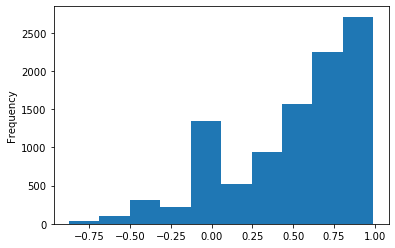

In [55]:
df_vaderized['vader_compound'].plot(kind='hist')

In [56]:
sentiment_variables = ['afinn_score','afinn_adjusted', 'vader_neg', 'vader_neu', 'vader_pos']

df_vaderized.groupby('rating')[sentiment_variables].mean()

,afinn_score,afinn_adjusted,vader_neg,vader_neu,vader_pos
rating,,,,,
High,5.003299,10.497266,0.011848,0.836356,0.151793
Low,2.466909,7.202208,0.021357,0.855191,0.123449


#### Word List

Occasionally, you will have a sentiment list from a different source that you would like to use. Or, more generally, you have a word list about any subject, not just attitudes, and you want to count their occurrences in texts, such as the use of words associated with politics or hypothesis testing. 

The final section of the lesson shows the steps for building a function that can analyze texts for the presence of words on any given list. In this case, the sample list will be words associated with men that were assembled by [Danielle Sucher](https://github.com/DanielleSucher/Jailbreak-the-Patriarchy). 

The list is stored as a csv file. Pandas can be used to read the word list and turn it into a Python list.

In [57]:

male_csv_location = 'https://raw.githubusercontent.com/nealcaren/KULeuvenBigData/master/notebooks/data/male_words.csv'


male_words_df = pd.read_csv(male_csv_location)

male_words_df.sample(10)

,term
4,grandson
2,uncles
33,dude
25,dads
43,father
11,men's
21,grandfather
38,prince
31,boy
1,priest


In [58]:
male_words_list = male_words_df['term'].values

The function that looks for cooccurences has two parts. A preliminary helper function transforms the original text string into a list of lower case words stripping out any punctuation. 

In [59]:
def text_to_words(text):
    '''Transform a string to a list of words,
    removing all punctuation.'''
    text = text.lower()

    p = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    text = ''.join([ch for ch in text if ch not in p])

    return text.split()

In [60]:
text_to_words('Make this lower case and remove! All? Punctuation.')

['make', 'this', 'lower', 'case', 'and', 'remove', 'all', 'punctuation']

The main function takes two arguments, the text and the word list. First, the text string is transformed to a list using `text_to_words`. Second, a new list `intersection` is created which contains only those elements from the text list that are in the word list. Finally, the function returns the length of the intersection. 

In [61]:
def count_occurences(text, word_list):
    '''Count occurences of words from a list in a text string.'''
    text_list = text_to_words(text)

    intersection = [w for w in text_list if w in word_list]

    return len(intersection)

In [62]:
count_occurences('He went to the store.', male_words_list)

1

The function can now be applied on the Times dataframe to count ocurrences of male words in the comments. Since the function takes a second arguement, the word list, this is passed to the `apply` method as a tuple.

In [ ]:
un_df['male_words'] = un_df['speech_text'].apply(count_occurences, 
                                                   args=(male_words_list, ))